In [1]:
cd(@__DIR__)
include(raw"utils\utils.jl")

Undrift!

Making a calendar of 100 years

In [2]:
try 
    using Dates
catch ; 
    import Pkg
    Pkg.add("Dates")
    using Dates
end
k=100
DatesRange=collect(Date(1900):Day(1):Date(1900+k))
N=length(DatesRange)

36525

# AR model on the whole series

## AR(1)

In [3]:
x0=-3.
Φ,σ=0.6,6

(0.6, 6)

In [4]:
include("utils/Simulation.jl")
x=[x0 ; simulation(x0,Φ,σ,N-length(x0))]

36525-element Vector{Float64}:
  -3.0
   0.12111096672803123
   5.468850617951343
  -1.6713880192074835
  -1.460089286912826
   3.2466617228360124
   4.515044012640605
   6.952265118580158
  -4.964460056019464
  -1.1043784666515088
   ⋮
   1.8067838430140242
   1.460835158386907
  -1.7982009357432696
  -9.028836127002604
 -15.62006484187328
  -8.347444295480068
  -0.24956970782529275
  -4.717727322648591
 -20.59721924045964

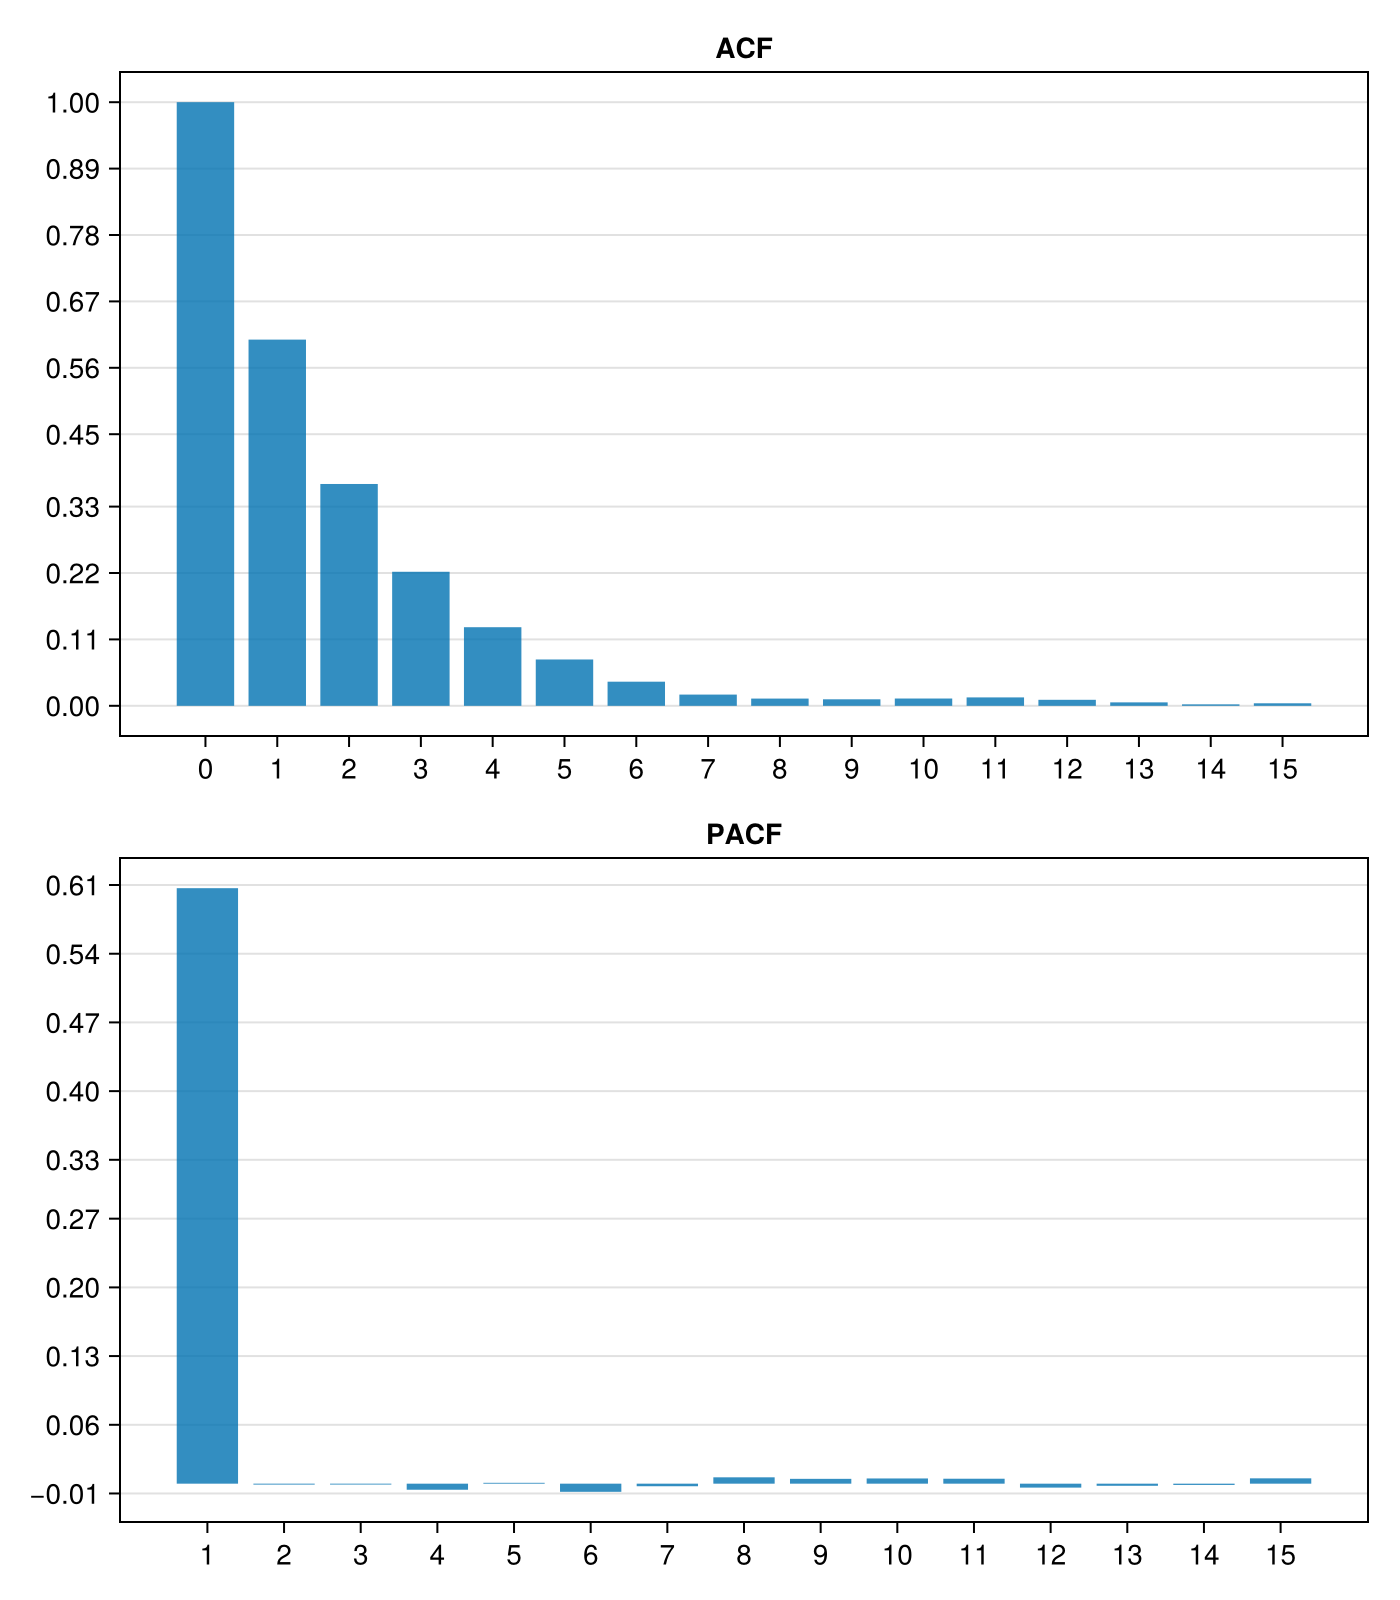

In [5]:
include("utils/ACF_PACF.jl")
ACF_PACF(x)

In [6]:
include("utils/Estimation.jl")
Parameters_est=LL_AR_Estimation(x,1)
Φ_hat,  σ_hat=Parameters_est[1][1], Parameters_est[2]
table = DataFrame("Parameters"=>"Φ", "Error"=>abs(Φ_hat-Φ), "Percentage error"=>100*abs(Φ_hat-Φ)/abs(Φ))
push!(table,("σ",abs(σ_hat-σ),100*abs(σ_hat-σ)/abs(σ)))

Row,Parameters,Error,Percentage error
,String,Float64,Float64
1,Φ,0.00679079,1.1318
2,σ,0.0121104,0.201841


# AR model on each month

Parameters for each month

In [7]:
Φ_month=[5,-7,2,7,-2,7,-5,6,3,1,4,-2] / 10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]

12-element Vector{Float64}:
 1.5
 2.0
 4.5
 7.0
 8.0
 3.0
 4.5
 1.0
 7.0
 2.5
 3.0
 6.0

Generation of the series associated

In [8]:
n_month=200
x=SimulateMonth(4.,Date(2000,11,1),Φ_month,σ_month,n_month)
Date_vec=collect(Date(2000,11,1):(Date(2000,11,1) + Month(n_month) - Day(1)))
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{AbstractVector}}:
 [[4.386511955441816, 1.6624924278011528, 0.4296190381523747, -1.8229412648250338, -0.30787815457149004, 1.713197550625692, 2.2825990999250636, 1.9675018410469083, 0.8670506326394829, 0.7832818793760565  …  -0.9857605467693897, 0.41770865844889515, -2.3984444733029937, -0.26598002848154967, -1.830116078553651, 0.8840384500726699, 0.1656314536327116, 0.037770915155406266, 0.4202929771189126, -0.9779353571452493], [4.037594802327397, 2.831118898683301, -1.5914378536172893, -2.837977071652954, 1.2305027909678516, 0.6621832869132789, -3.4524799467590417, 0.7045637045382473, -0.47446602662856374, -0.058671863113980094  …  0.8758675374259679, -0.8538749499856674, -0.46428597568310803, -0.565192109486155, 3.43620677584386, 2.7884029925162004, -0.6299332869205565, 1.0309528540619584, 0.2442261075495037, -2.272471241404363], [-1.1830458709343583, -2.0813903109374676, -1.3741203800781143, 0.06530449543467287, 0.5110892459818657, 0.7594907979622668, 1.19

## Autocorrelations

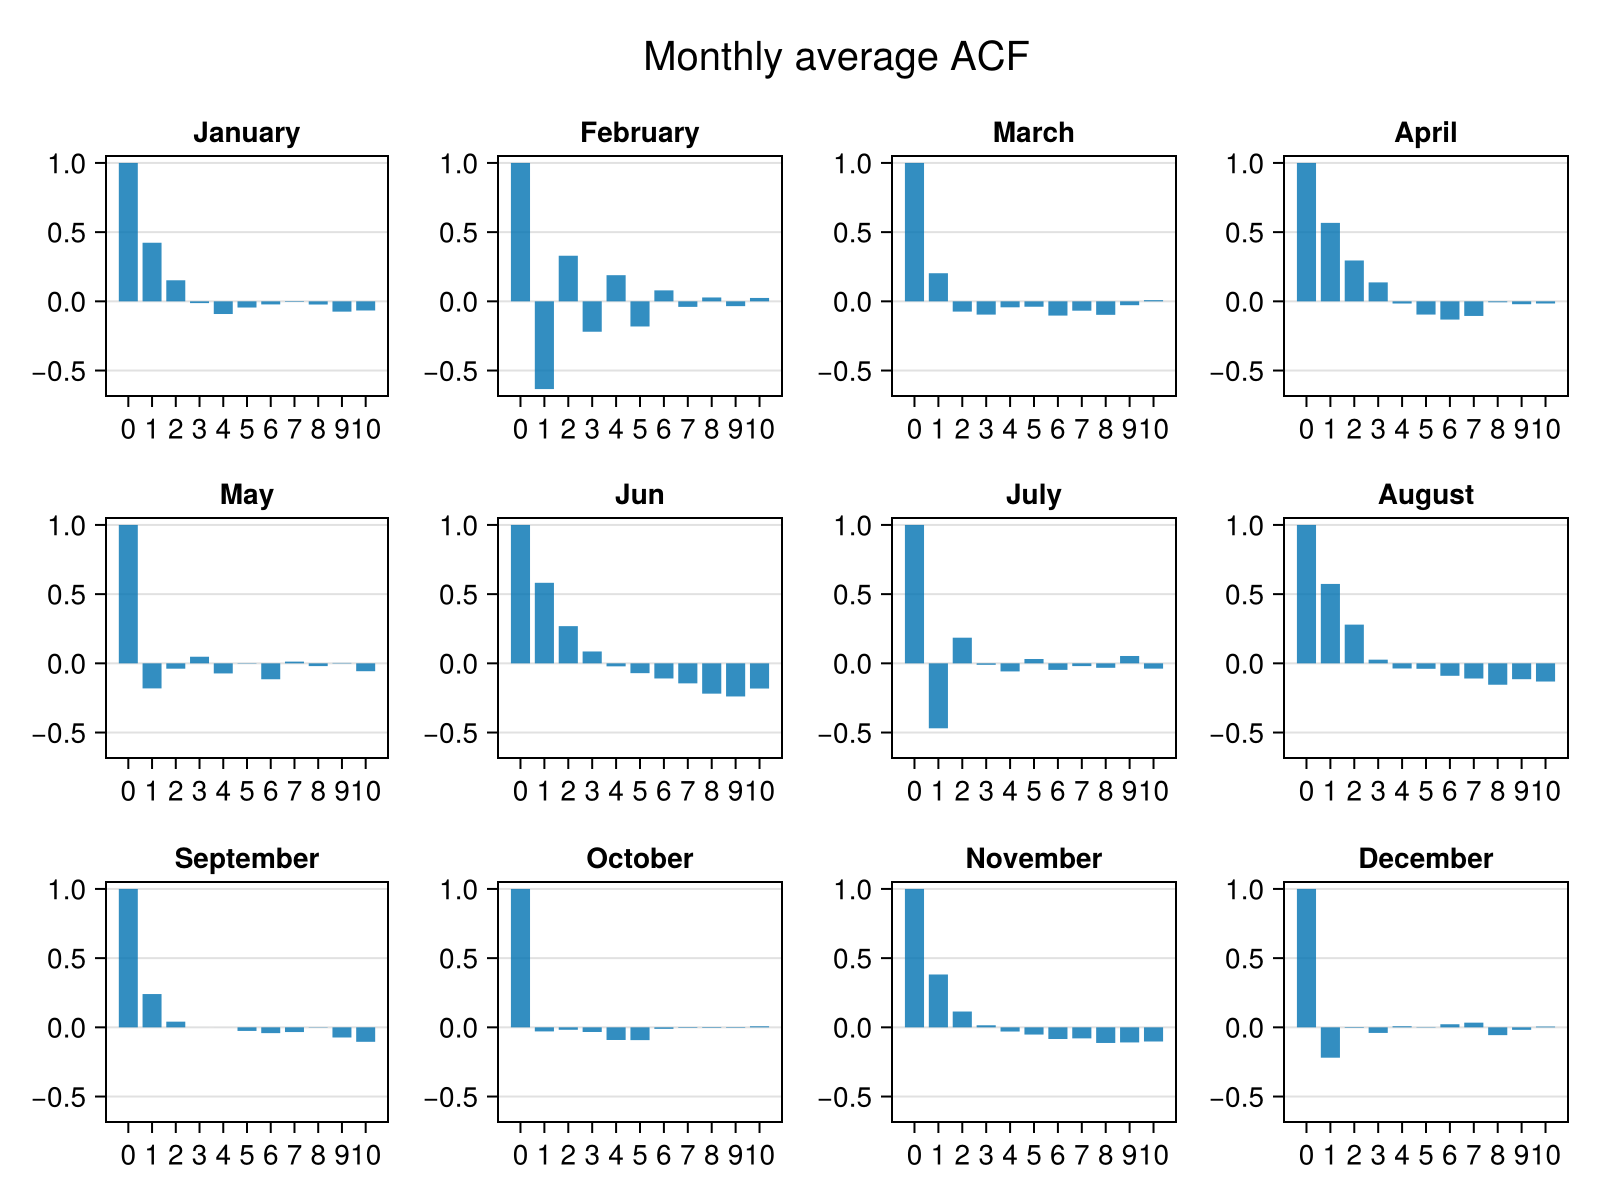

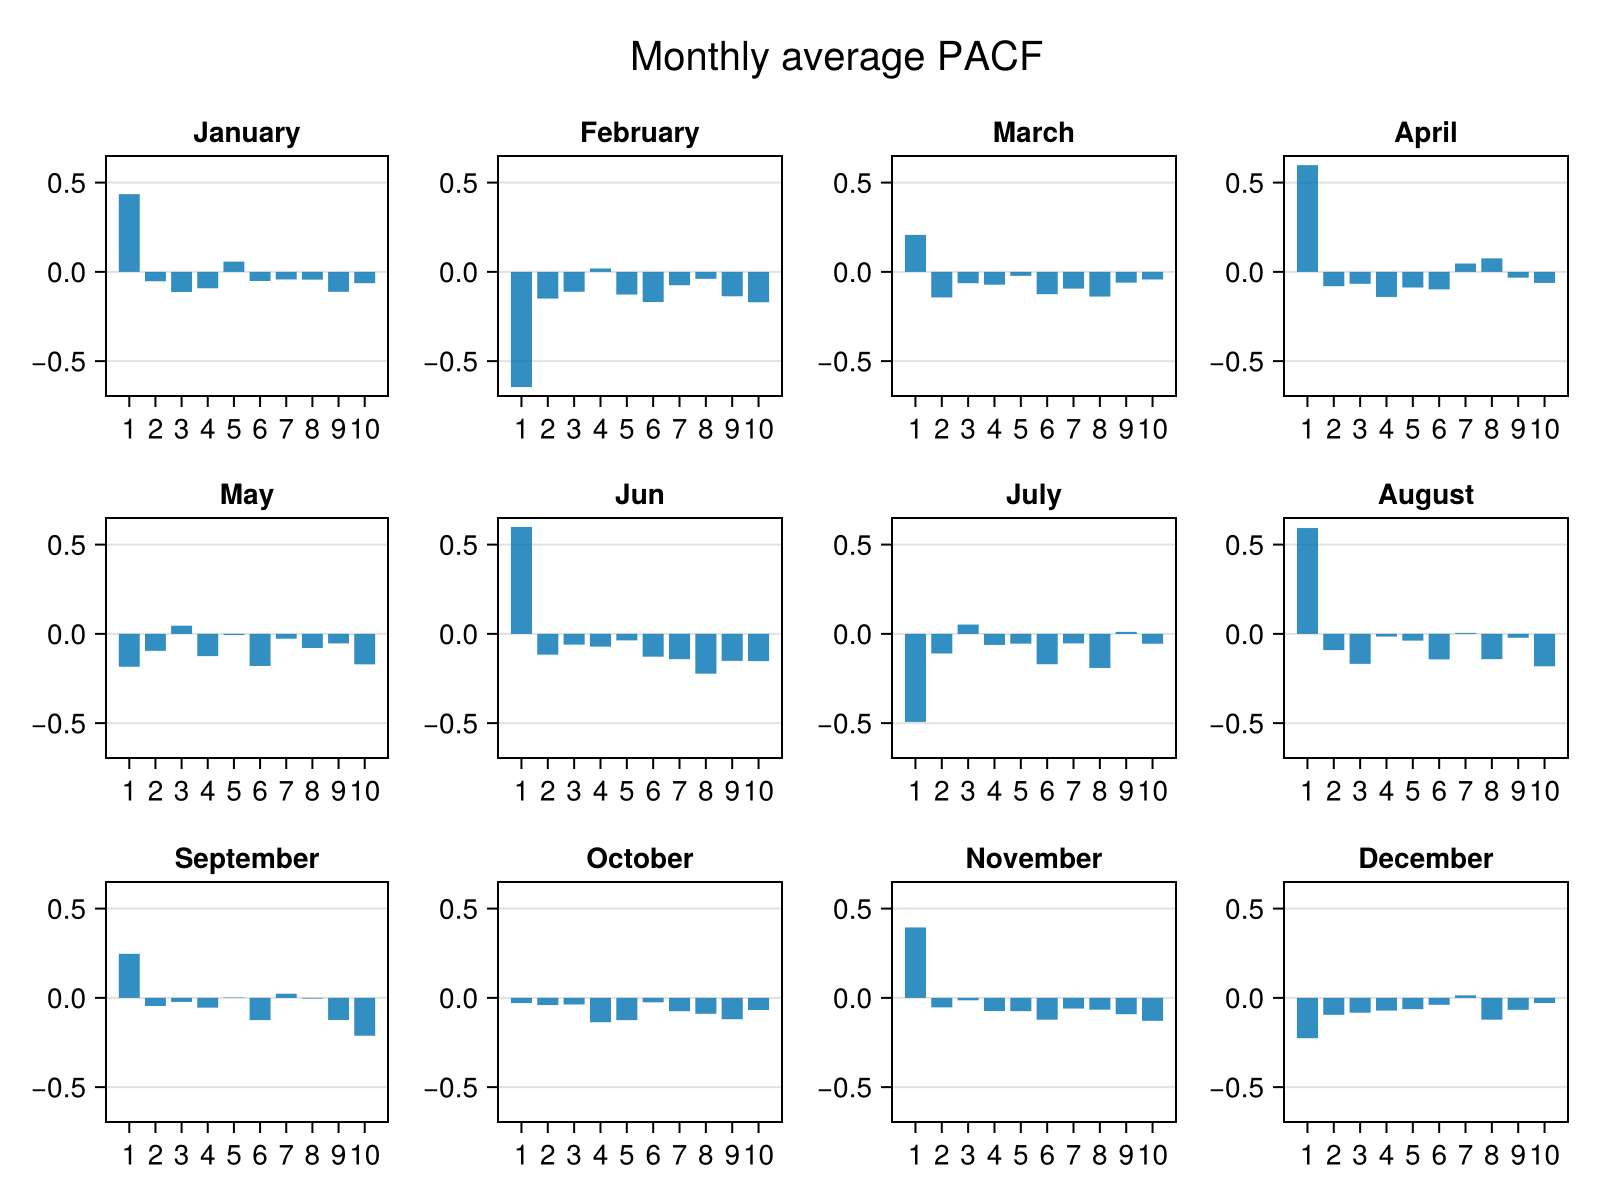

CairoMakie.Screen{IMAGE}


In [9]:
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

## Estimating models

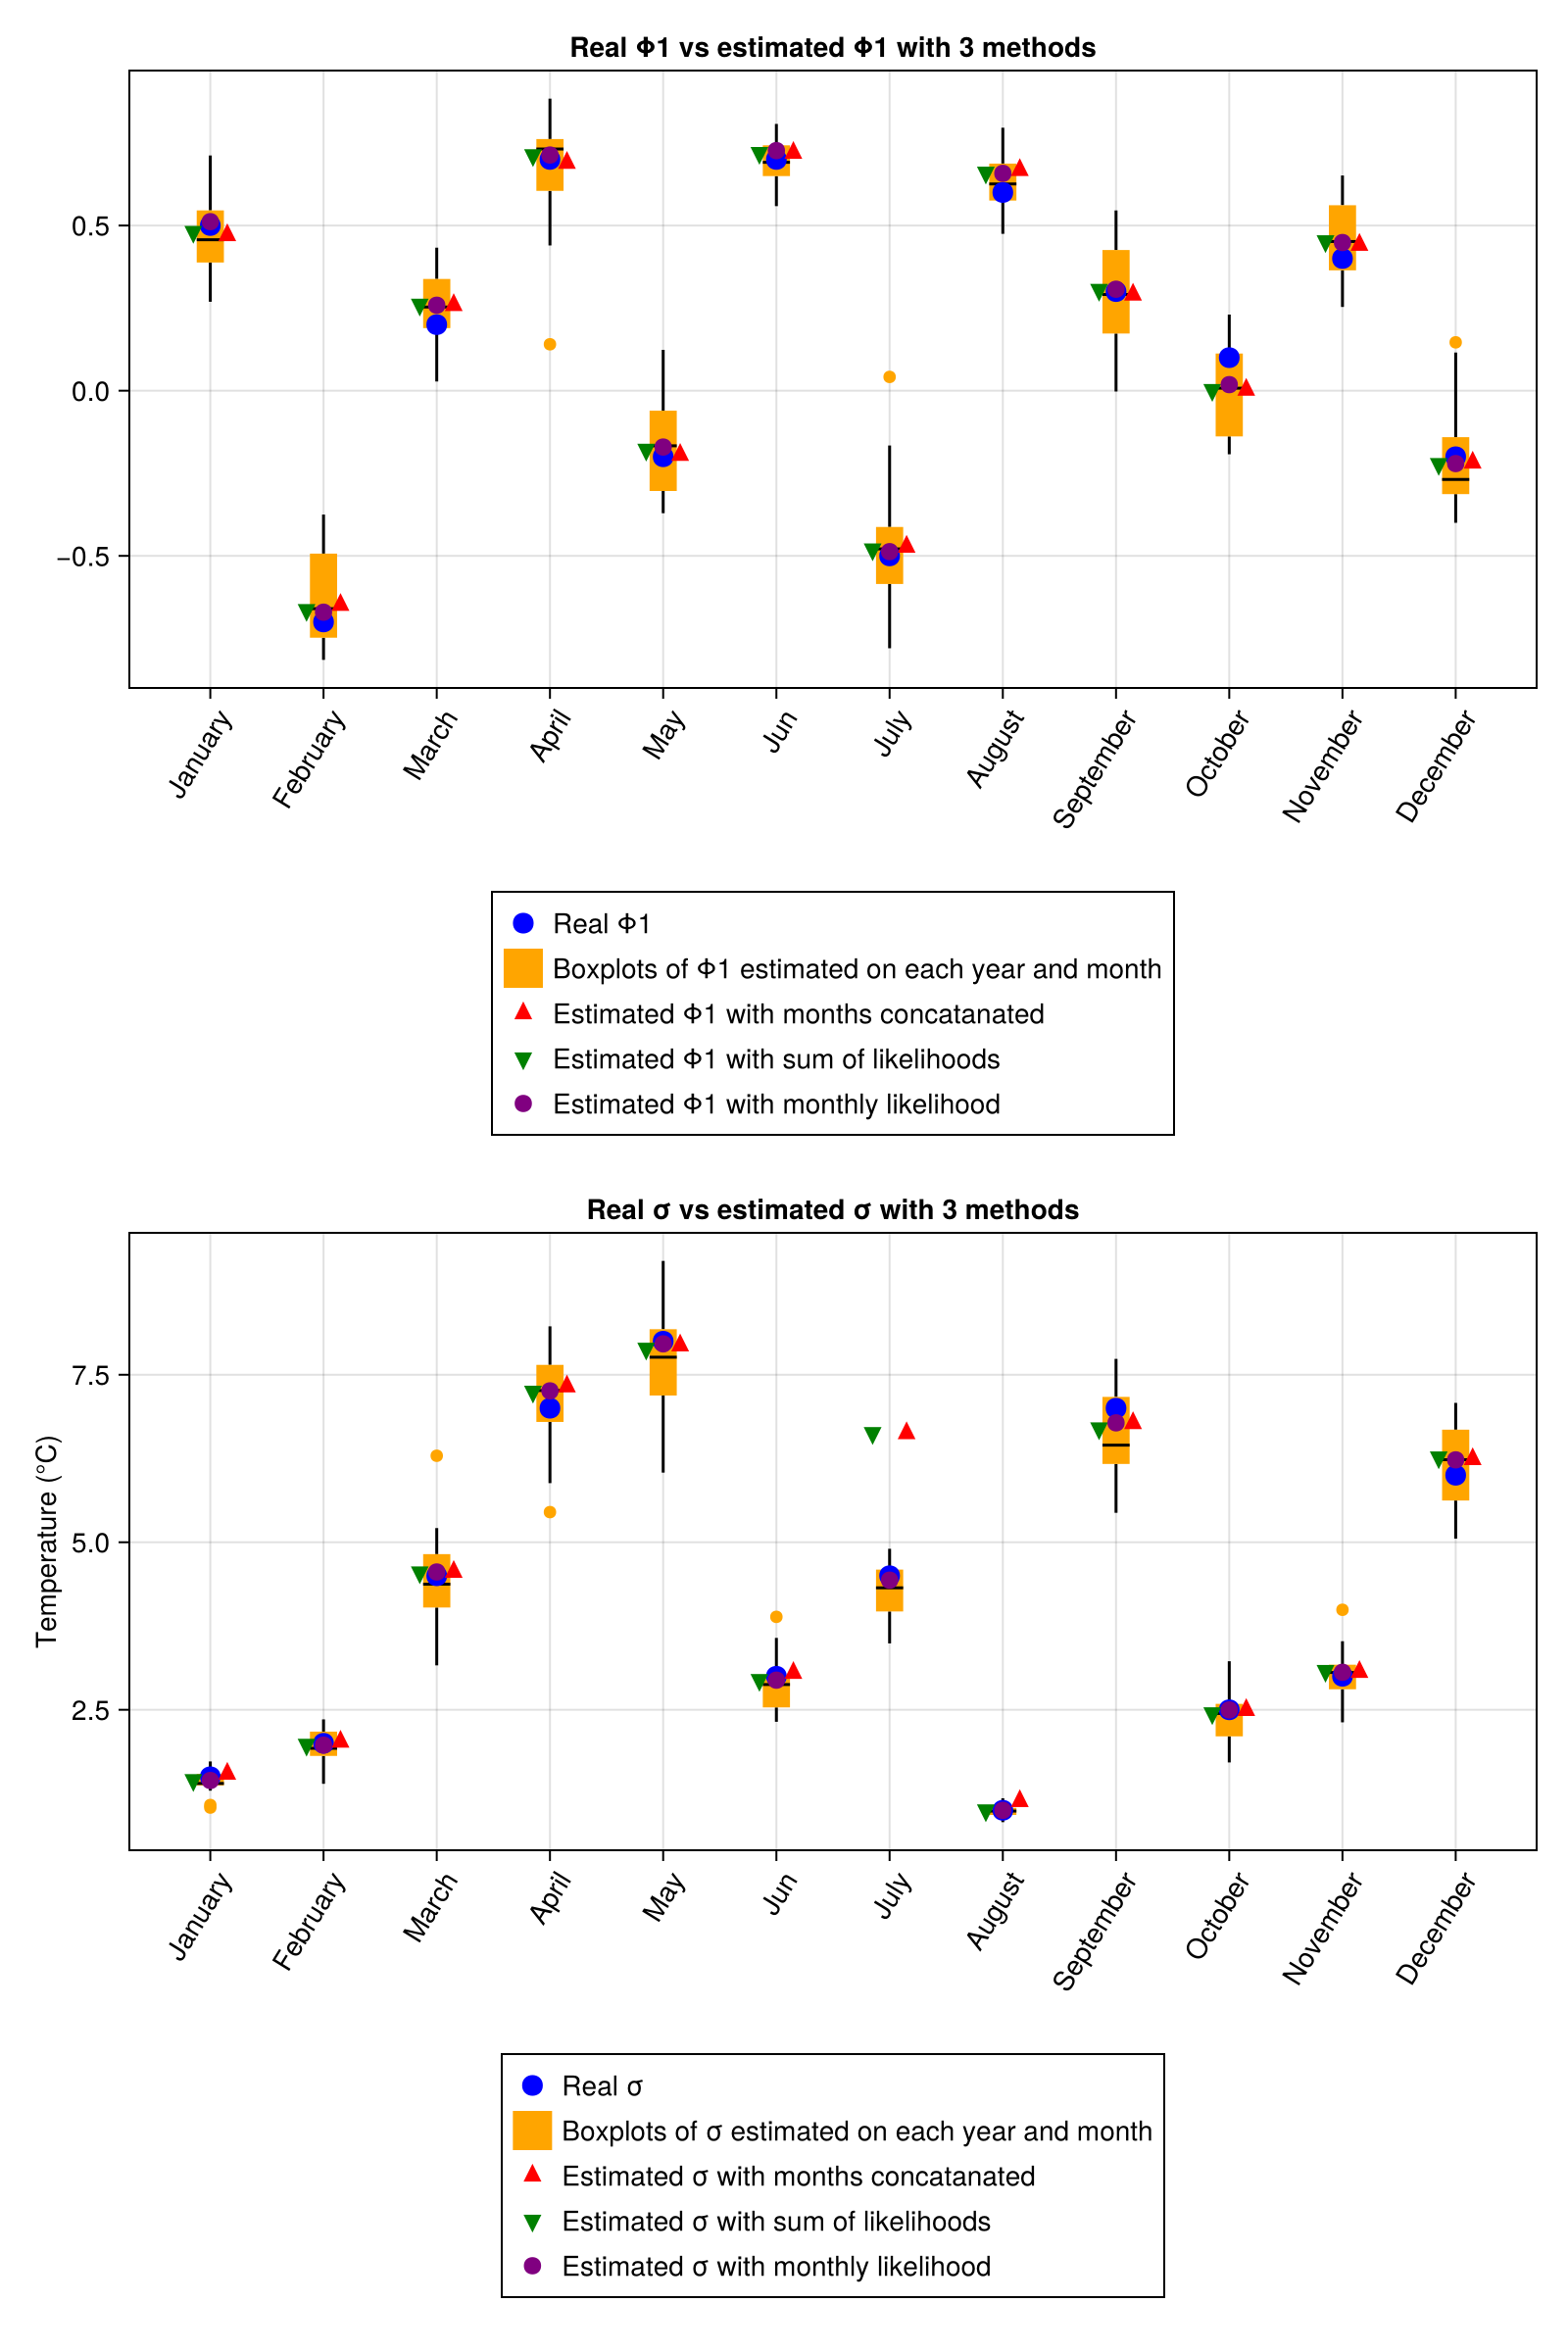

Row,Parameter,Month concatanation,Sum LL,Monthly LL,mean of monthly parameters,median of monthly parameters
,String,Float64,Float64,Float64,Float64,Float64
1,Φ1,15.5301,16.0298,14.5882,16.7457,17.8644
2,σ,6.91635,6.09115,1.91751,3.02675,3.74603


7

In [10]:
include(raw"utils\Estimation.jl")
Parameters,autofig,PercentageErrorTable=AllEstimation(x,1,Date_vec=Date_vec,TrueParamVec=[Φ_month,σ_month],ErrorTable=true)
display(autofig)
display(PercentageErrorTable)

In [11]:
include("utils/Simulation.jl")
Φ_vec, σ_vec = AutoTakeParameters((Parameters,PercentageErrorTable))
n_years=10
sim=SimulateScenarios([4.],Date(2001,1,1):(Date(2001,1,1) + Year(n_years-1)),Φ_vec, σ_vec,n=10)
sample_=GatherYearScenarios(sim,Date(2001,1,1):(Date(2001,1,1) + Year(n_years-1)))


366-element Vector{Vector{AbstractFloat}}:
 [4.0, -0.8725133875108704, -0.24027974224953857, 4.284118891743549, -0.5122535027453108, 0.4830671669096167, -0.9421622818039399, -3.6326280485640394, 2.6267233121795446, 0.9364513924745632  …  4.0, 2.063543769617456, -2.6840164465877736, -3.27744068997856, 1.2666217968376818, -4.081107443636865, 0.11918263485153124, -4.9539500379949795, 2.25471452927649, 1.6380853248036713]
 [1.6855955587799212, -0.8133427656679182, -0.8821064855865237, 2.0798299495730355, -2.278637255182826, 0.8612943896661704, -1.129344021887825, -3.6071859965203084, -0.7492014928507713, 5.173850288236378  …  -1.2210353004810837, 1.4273152703555625, -0.7976687997768792, -1.3172939230126257, -0.756441562521805, -0.6639193280798312, -0.6776534783744004, -3.1253373175806347, -3.0949262628941803, 2.8933201741737458]
 [1.110182555267183, 0.5537730600856784, -0.5883912464409928, 2.3999979418330004, -1.6024882701538714, -2.232843389160517, 0.39637765925875523, -4.289927811673157,

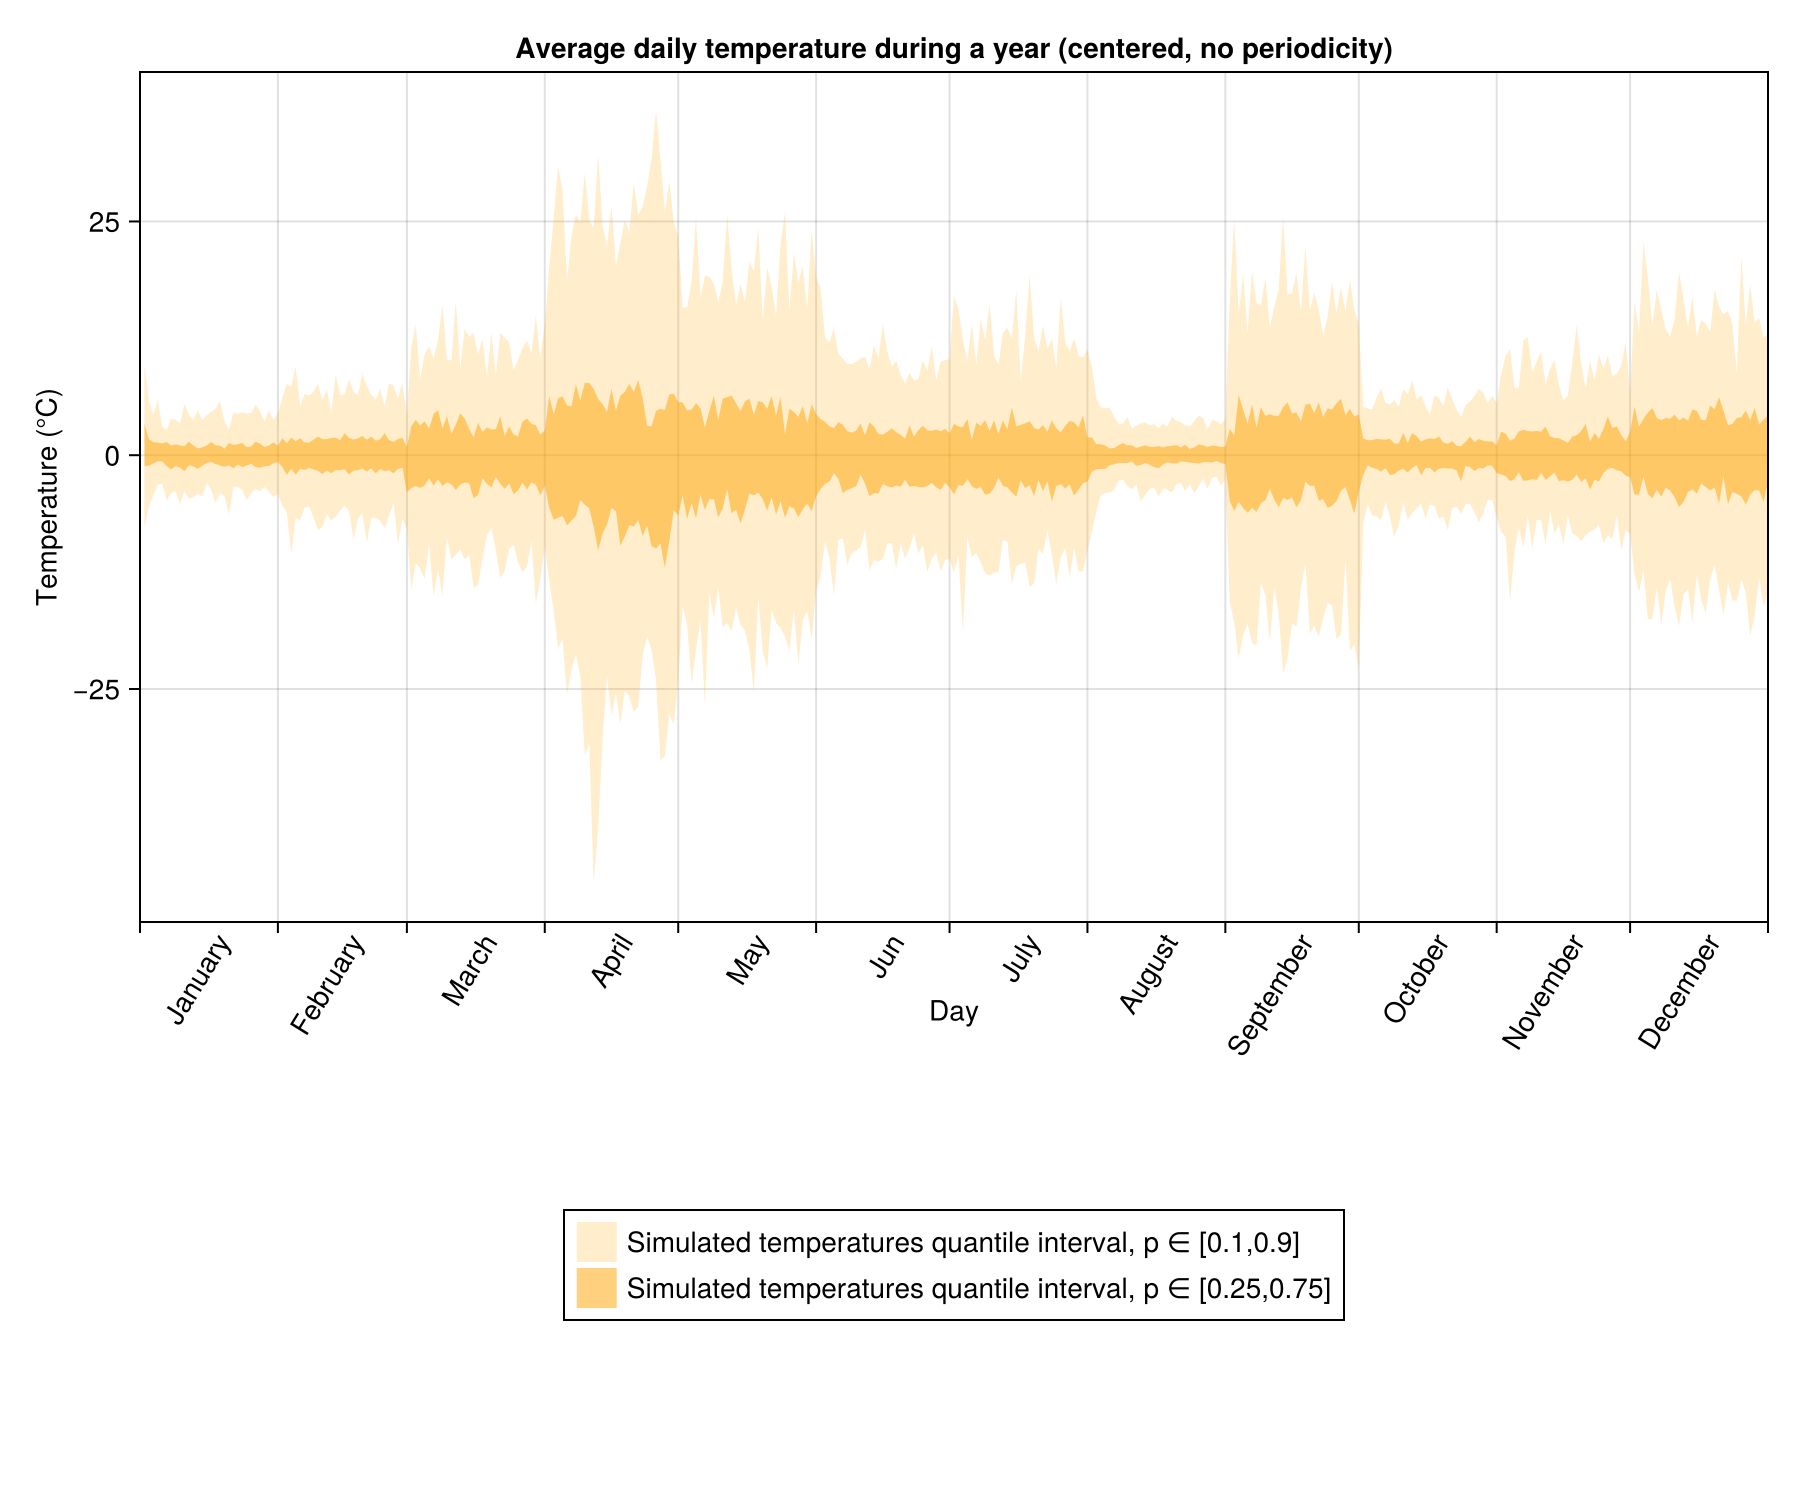

In [12]:
include("utils/Plotting.jl")
PlotYearCurves([],
["Simulated temperatures quantile interval, p ∈ [0.1,0.9]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered, no periodicity)",
[(minimum.(sample_),maximum.(sample_)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)